**Heart disease detection Project**





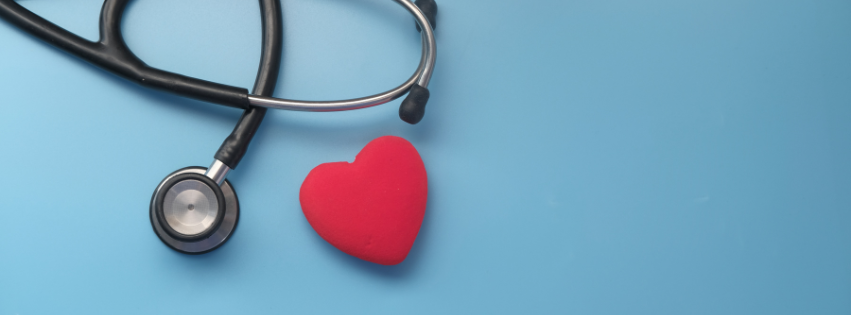

The goal of this project


*   Investigate the factors that lead to heart disease

*   To build a machine learning model to predict whether the patient has heart disease or not



Build and test four machine learning models: logistic, K-NN, Random Forest classifier and  support vector machine.The champion model is the logistic model with a recall score of .



Data source : https://www.kaggle.com/code/alkidiarete/heart-disease-roc-0-98/input



Columns :

1. HeartDisease : This column information about whether someone has heart disease or not.

2. BMI : Stands for Body Mass Index, which measures the proportion of weight to height for an individual.

3. Smoking : This column may store information about whether someone smokes or not.

4. AlcoholDrinking : Information about whether someone consumes alcoholic beverages or not.

5. Stroke : Could contain information about whether someone has had a stroke or not.

6. PhysicalHealth : This column might describe someone's physical health condition.

7. MentalHealth : Indicates someone's mental health condition.

8. DiffWalking : Likely stores information about whether someone has difficulty walking or not.

9. Sex : Indicates someone's gender.

10. AgeCategory : Groups someone's age into specific categories.

11. Race : Stores information about someone's race or ethnicity.

12. Diabetic : Information about whether someone has diabetes or not.

13. PhysicalActivity : Indicates how active someone is in physical activities.

14. GenHealth: Describes someone's overall health condition.

15. SleepTime : Someone's sleep time, which could be an indicator of sleep health.

16. Asthma : Information about whether someone has asthma or not.

17. KidneyDisease : Could contain information about whether someone has kidney disease or not.

18. SkinCancer : Information about whether someone has skin cancer or not.




In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

 Data Preparation ⏭
Check the dataset for missing values. Implement solution for missing values.



In [ ]:
path = '/content/heart.csv'
df = pd.read_csv(path)

In [ ]:

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There are 319795 rows and 18 columns in the dataset. No missing value is found.
There are two datatypes: numerical and categorical. We will explore them seperately in the following analysis.

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000




*   The average BMI of the patients is approximately 28 which is Overweight = 25 - 29.9
*  The minimum BMI of patients is 12 which is Underweight = Underweight = <18.5

*   The average scores for Physical Health and Mental Health show a slight difference, being 3.3 and 3.8, respectively.
*   The average Sleep time of patients is 7 hrs.


*   The minimum recorded Sleep Time is just 1 hour, while the maximum is 24 hours.








In [ ]:
 df.duplicated().sum()

18078

In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-10-deeae1520d70>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='hls')


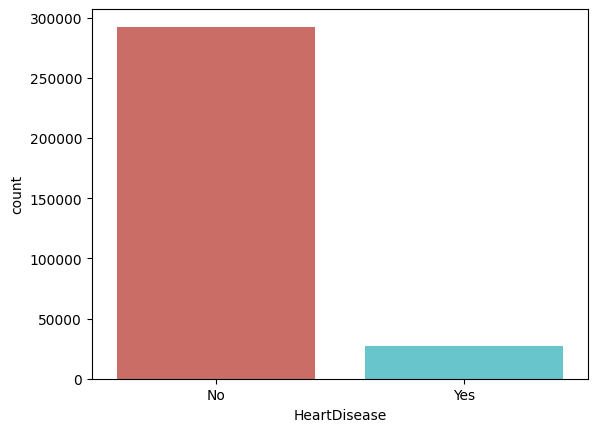

In [ ]:
sns.countplot(x='HeartDisease', data=df, palette='hls')
plt.show()

The number of patients without heart disease is higher than those with heart disease.








In [ ]:
num_cols = ["BMI" , "PhysicalHealth" , "MentalHealth" , "SleepTime"]

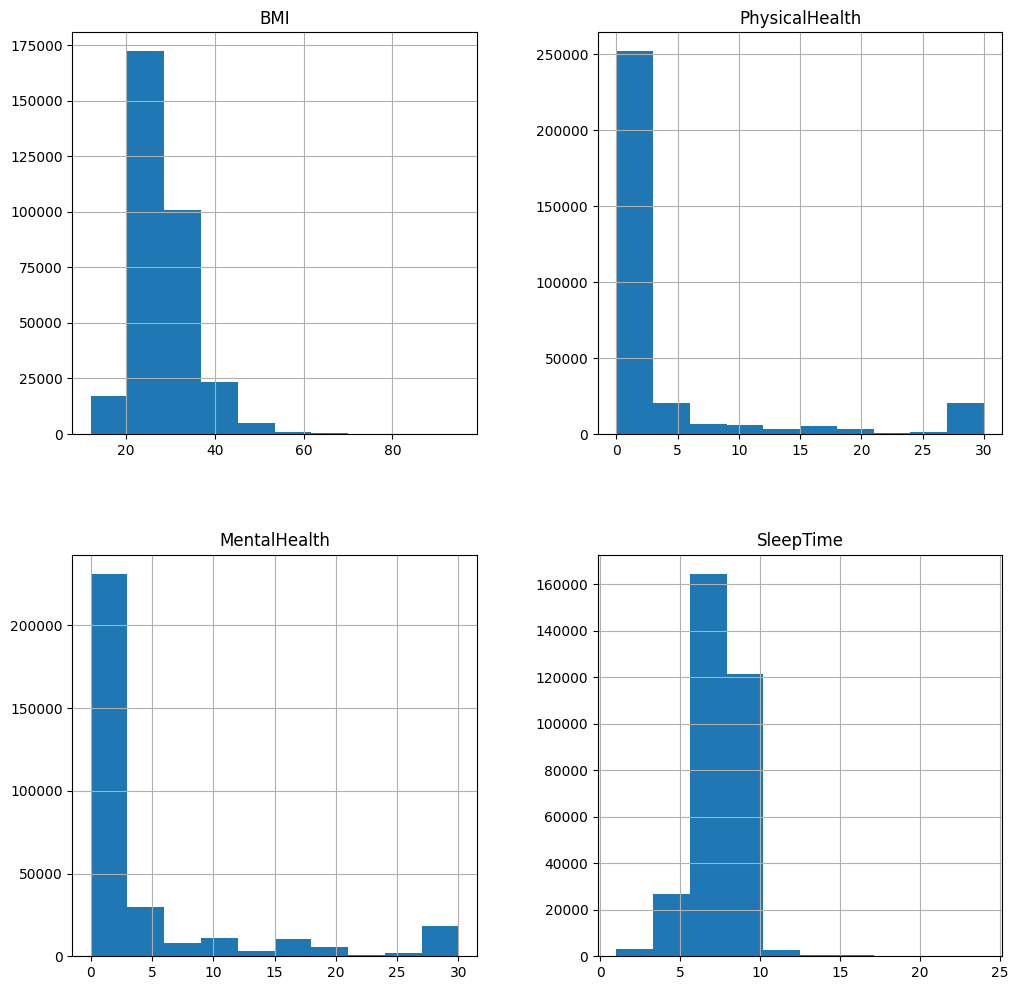

In [ ]:
df[num_cols].hist(figsize = (12,12))

plt.show()



*   The variables have different scales, so standardization is necessary to improve model preparation.
*  BMI appears to be approximately normally distributed, with the majority of patients falling within the range of 20 to 40.


*   Physical Health and Mental Health are right-skewed: most of patients have score below 20.
*   Sleep times appears to be approximately normally distributed, with the majority of patients sleep in the range of 6 to 10 hours.





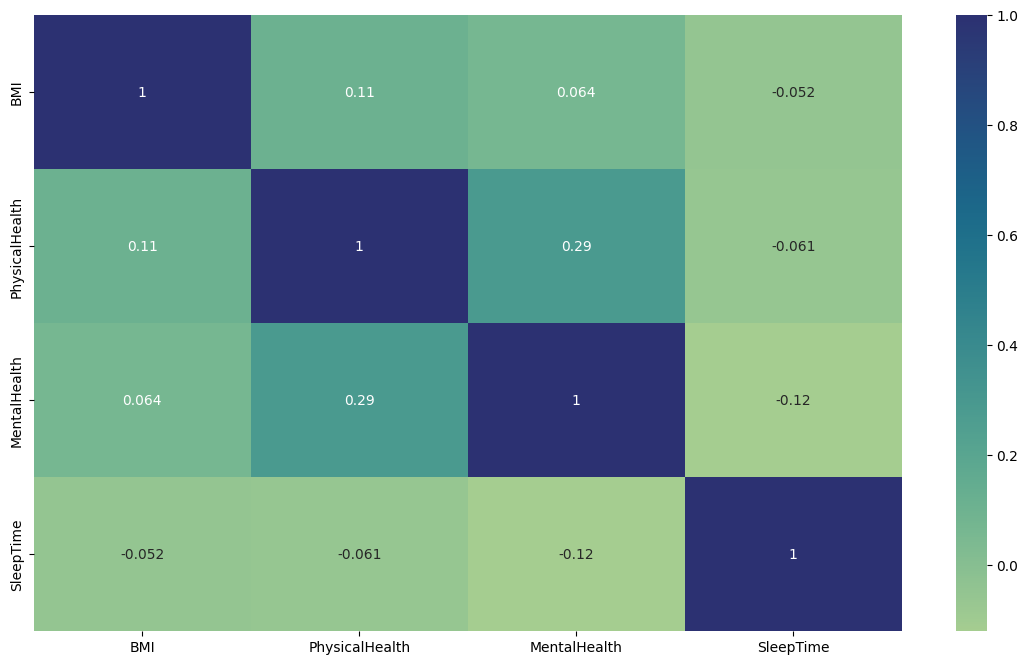

In [ ]:
plt.figure(figsize = (14,8))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'crest')

plt.show()



*   Mental Health and  Physical Health of patients are correlated with each others.
*   BMI is correlated with Physical Health of patients.



In [ ]:
cat_cols = [ 'HeartDisease' , 'Smoking' , 'AlcoholDrinking' , 'Stroke' , 'DiffWalking' , 'Sex' , 'AgeCategory' , 'Race' , 'Diabetic' , 'PhysicalActivity' ,'GenHealth' , 'Asthma' , 'KidneyDisease' , 'SkinCancer']

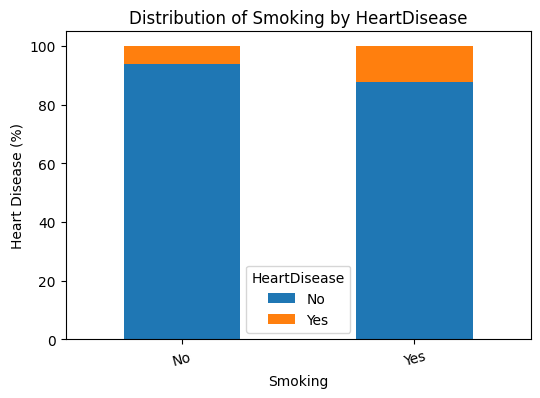

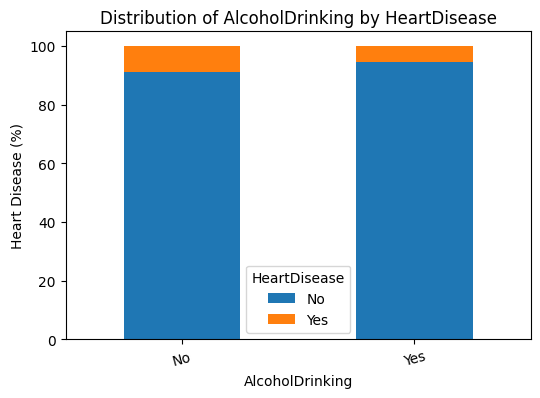

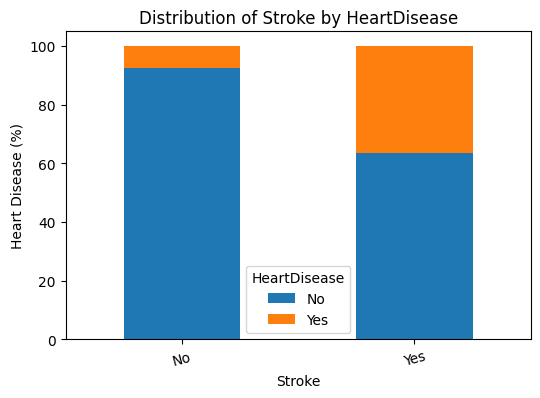

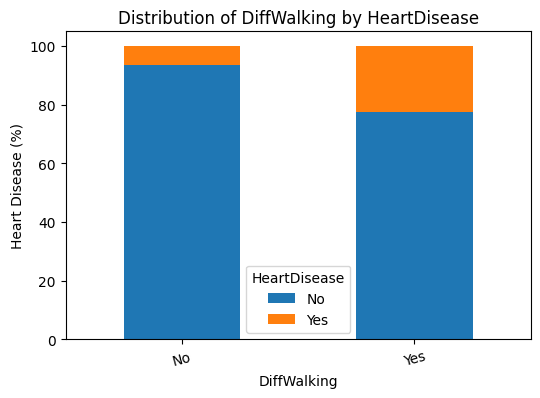

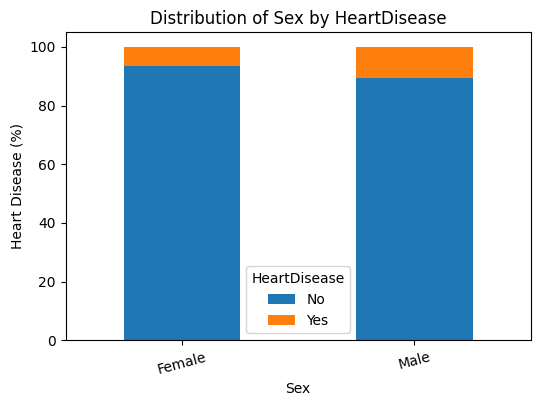

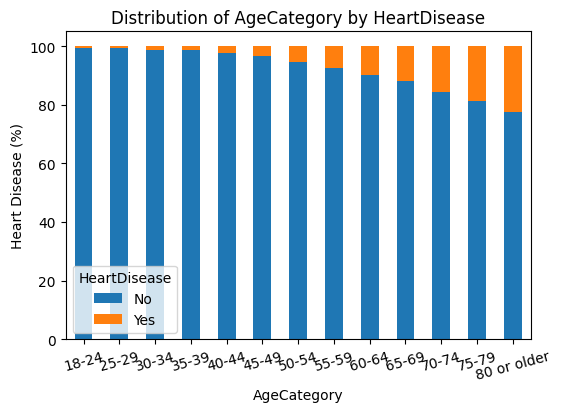

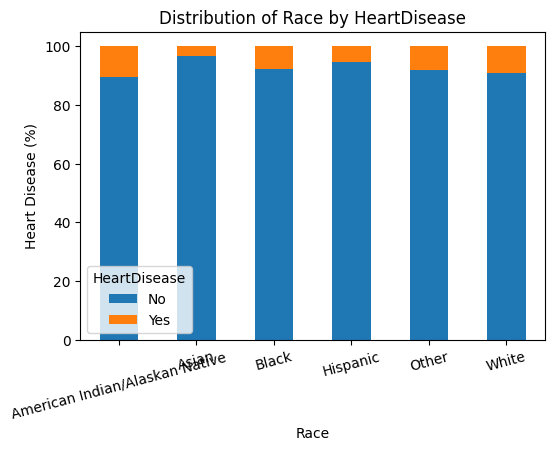

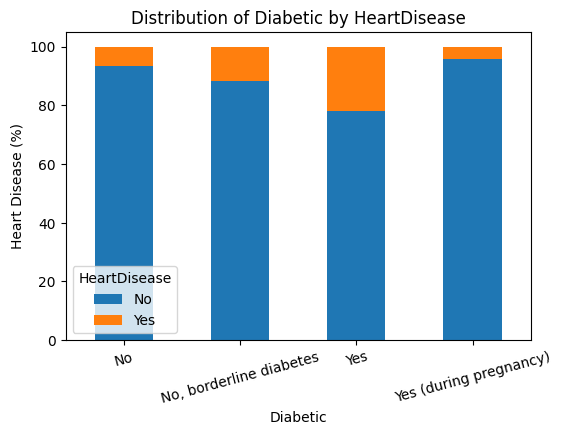

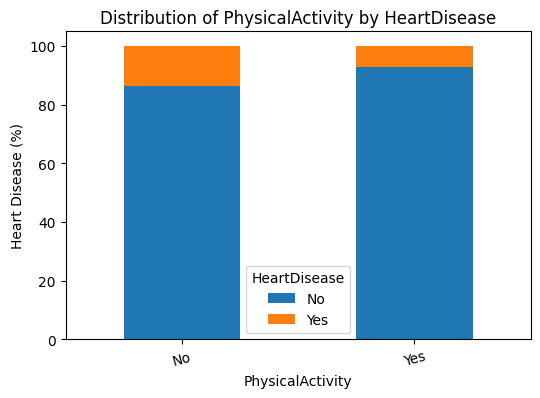

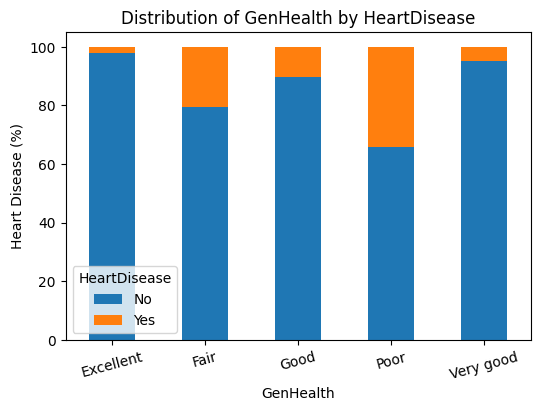

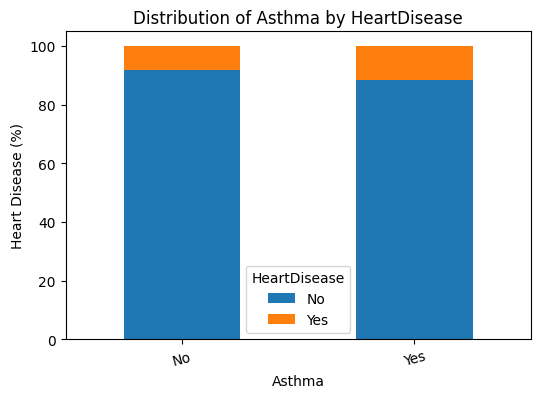

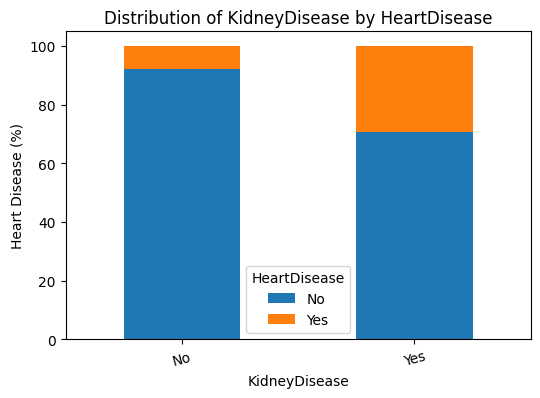

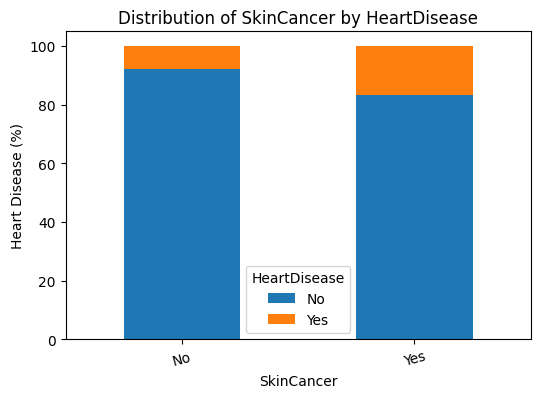

In [ ]:
for i in cat_cols:
    if i != 'HeartDisease':
        fig, ax = plt.subplots(figsize = (6,4))
        crosstab = pd.crosstab(df[i], df['HeartDisease'], normalize = 'index') * 100
        crosstab.plot(kind = 'bar', stacked = True, ax = ax)
        ax.set_ylabel('Heart Disease (%)')
        ax.tick_params(axis = 'x', rotation = 15)
        ax.set_title(f'Distribution of {i} by HeartDisease')

        plt.show()

*  The heart disease of the patience is affected by Skin Cancer, Kidney Disease, Poor of Gen Health, Diabetic, DiffWalking, Stroke, Smoking, Physical Activity.
*   Male patients have a higher prevalence of heart disease compared to female patients.


*   Older patients tend to develop heart disease more easily.
*   Native American Indians/Alaskans have a higher likelihood of developing heart disease.






.






In [ ]:
df.groupby(['HeartDisease'])[num_cols].mean().T

HeartDisease,No,Yes
BMI,28.224658,29.401592
PhysicalHealth,2.956416,7.808242
MentalHealth,3.828778,4.641764
SleepTime,7.093416,7.136156




*   BMI and Sleep time do not significantly impact heart disease.
*   The patient's physical health influenced their heart disease.

*  The patient's mental health influenced their heart disease.






Preprocessing ▶

In [ ]:
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import ssl
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
sns.set()

In [ ]:
#create dummy variables for some categorical variables
dummy_vars = [ 'Smoking' , 'AlcoholDrinking' , 'Stroke' , 'DiffWalking' , 'Sex' , 'AgeCategory' , 'Race' , 'PhysicalActivity' ,'GenHealth' , 'Asthma' , 'KidneyDisease' , 'SkinCancer']
HeartDisease = {'Yes': 1, 'No': 0}
Diabetic = {'Yes': 1, 'No': 0}

# Check if columns exist before creating dummies
dummy_vars_to_use = [col for col in dummy_vars if col in df.columns]

df = pd.get_dummies(data = df, columns = dummy_vars_to_use, drop_first= True) # Only use columns that exist
df['HeartDisease'] = df.HeartDisease.map(HeartDisease)
df['Diabetic'] = df.Diabetic.map(Diabetic)

In [ ]:
y = df['HeartDisease']
X = df.drop('HeartDisease', axis = 1)

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
PhysicalHealth,0
MentalHealth,0
Diabetic,9340
SleepTime,0
Smoking_Yes,0
AlcoholDrinking_Yes,0
Stroke_Yes,0
DiffWalking_Yes,0


In [ ]:
Diabetic_mean = df['Diabetic'].mean()
Diabetic_mean

0.13142645471968561

In [ ]:
df['Diabetic'] = df['Diabetic'].replace(np.nan,Diabetic_mean)

In [ ]:
sc = StandardScaler(feature_range=(0, 1))

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [ ]:
#check the size of training and test datasets
print('Training data set for independent variables: ' + str(X_train.shape))
print('Training data set for target variable: ' + str(y_train.shape))
print('Test data set for independent variables: ' + str(X_test.shape))
print('Test data set for target variable: ' + str(y_test.shape))

Training data set for independent variables: (223856, 35)
Training data set for target variable: (223856,)
Test data set for independent variables: (95939, 35)
Test data set for target variable: (95939,)


In [ ]:
df.isnull().sum()


,0
HeartDisease,0
BMI,0
PhysicalHealth,0
MentalHealth,0
Diabetic,0
SleepTime,0
Smoking_Yes,0
AlcoholDrinking_Yes,0
Stroke_Yes,0
DiffWalking_Yes,0


**Model Building**


I will employ Logistic Regression, K-Nearest Neighbor (K-NN), Random Forest Classifier, and Support Vector Machine to develop machine learning models and evaluate their performance using a confusion matrix.

In the case of heart disease patients, our goal is to accurately predict those at risk of heart disease and provide timely interventions. We aim to minimize prediction errors, particularly the false negatives (lower-left side of the confusion matrix), which occur when we incorrectly predict that a patient will not develop heart disease. Thus, our primary performance metric is recall, calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher number of false negatives indicates a lower of recall score."




In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve


In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize =  (6,4))

    sns.heatmap(cm, annot = True, fmt= '.2f', xticklabels = ['Not heartdisease', 'heartdisease'], yticklabels = ['Not heartdisease', 'heartdisease'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

In [ ]:

#fit the model
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
def evaluation(model,X_train , y_train, X_test, y_test, train = True):
    if train == True:
        pred = model.predict(X_train)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_train, pred)
        plt.figure(figsize =  (6,4))
        sns.heatmap(cm, annot = True, fmt= '.2f', xticklabels = ['Not heartdisease', 'heartdisease'], yticklabels = ['Not heartdisease', 'heartdisease'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    if train == False:
        pred = model.predict(X_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_test, pred)
        plt.figure(figsize =  (6,4))
        sns.heatmap(cm, annot = True, fmt= '.2f', xticklabels = ['Not heartdisease', 'heartdisease'], yticklabels = ['Not heartdisease', 'heartdisease'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


Train Result:
Accuracy Score: 91.59%
_______________________________________________
F1 Score: 0.18
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.922261      0.543864  0.915883       0.733063       0.889872
recall          0.991592      0.107093  0.915883       0.549342       0.915883
f1-score        0.955671      0.178948  0.915883       0.567310       0.889187
support    204695.000000  19161.000000  0.915883  223856.000000  223856.000000
_______________________________________________


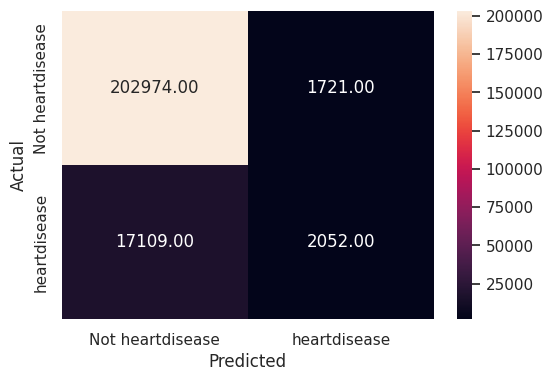

Test Result:
Accuracy Score: 91.62%
_______________________________________________
F1 Score: 0.18
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.922415     0.552876  0.916186      0.737645      0.890784
recall         0.991759     0.108865  0.916186      0.550312      0.916186
f1-score       0.955831     0.181911  0.916186      0.568871      0.889586
support    87727.000000  8212.000000  0.916186  95939.000000  95939.000000
_______________________________________________


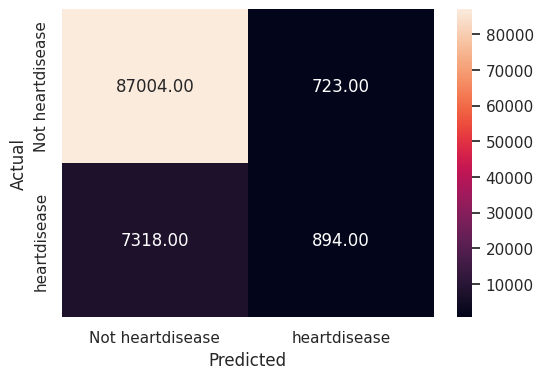

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
evaluation(lr, X_train, y_train, X_test, y_test, False)

check the model performance on training data and to check the performance on test dataset

The model has a recall score of 10% for both the training data and the test data. So this logistic model doesn't perform well based on our need.

In [ ]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

The precision-recall curve of the logistic model

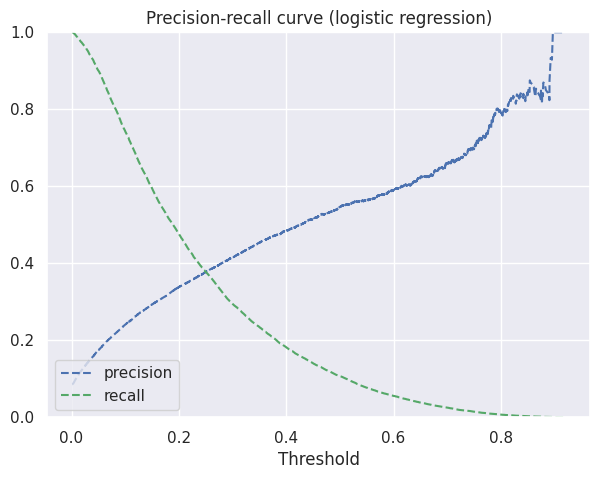

In [ ]:
y_scores_log = log.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train, y_scores_log[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (7,5))

plt.plot(thresholds_log, precisions_log[:-1], 'b--', label = 'precision')
plt.plot(thresholds_log, recalls_log[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'lower left')
plt.ylim([0, 1])
plt.title('Precision-recall curve (logistic regression)')


plt.show()

The precision and recall curves are balanced at the threshold of about 0.25. We can use this threshold and check the model performance on training and test data.

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    204695
           1       0.38      0.38      0.38     19161

    accuracy                           0.89    223856
   macro avg       0.66      0.66      0.66    223856
weighted avg       0.89      0.89      0.89    223856



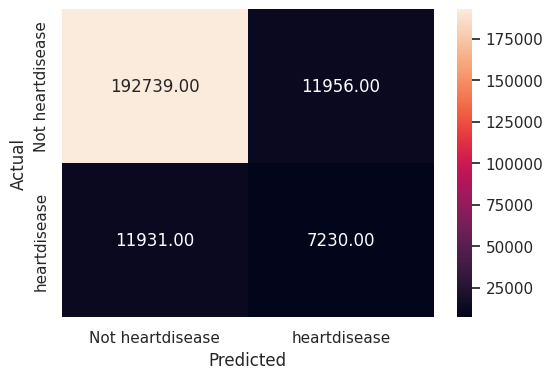

In [ ]:
threshold = 0.25
y_train_pred = log.predict_proba(X_train)

metrics_score(y_train, y_train_pred[:, 1] > threshold)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     87727
           1       0.38      0.38      0.38      8212

    accuracy                           0.89     95939
   macro avg       0.66      0.66      0.66     95939
weighted avg       0.89      0.89      0.89     95939



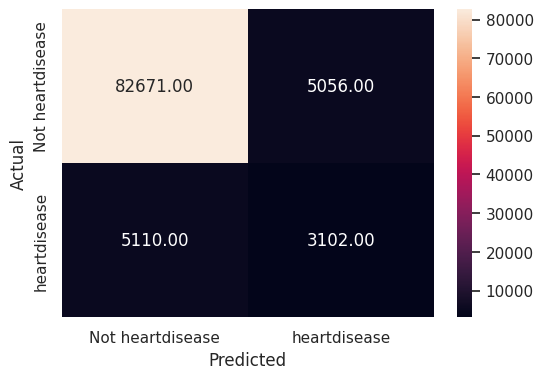

In [ ]:
threshold = 0.25
y_test_pred = log.predict_proba(X_test)

metrics_score(y_test, y_test_pred[:, 1] > threshold)

By adjusting the threshold value, the model achieves improved recall scores on both the training and test data (0.10 to 0.3). The performance scores are consistent across both sets, indicating that the model is well-generalized and does not overfit the training data. However, the recall score from the logistic regression model remains suboptimal. Therefore, we should consider exploring alternative approaches

**K-nearest neighbors (KNN)**

In [ ]:
accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))

print(accuracy_scores)

Train Result:
Accuracy Score: 92.20%
_______________________________________________
F1 Score: 0.37
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.930304    0.683099  0.921993     0.806701      0.907977
recall        0.988289    0.254260  0.921993     0.621274      0.921993
f1-score      0.958420    0.370583  0.921993     0.664501      0.905328
support    7685.000000  763.000000  0.921993  8448.000000   8448.000000
_______________________________________________


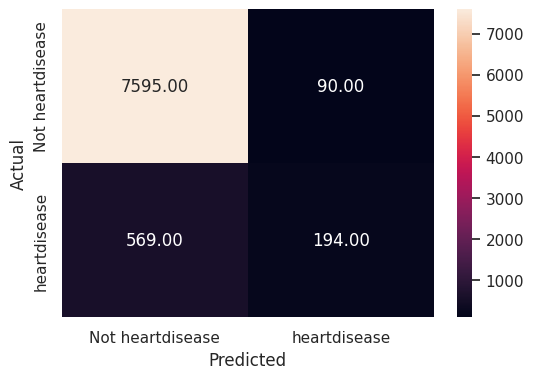

Test Result:
Accuracy Score: 90.07%
_______________________________________________
F1 Score: 0.18
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.917745     0.352362  0.900746      0.635053      0.866647
recall         0.978593     0.117223  0.900746      0.547908      0.900746
f1-score       0.947193     0.175921  0.900746      0.561557      0.877488
support    30738.000000  3054.000000  0.900746  33792.000000  33792.000000
_______________________________________________


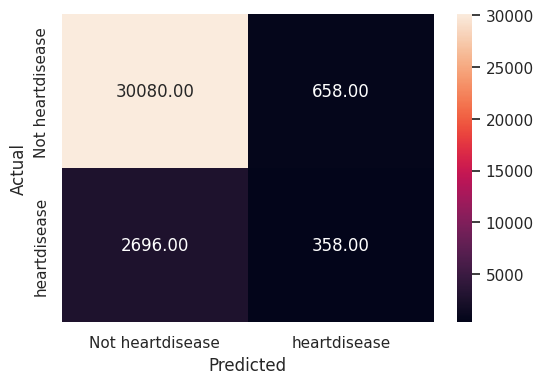

In [ ]:
knn = KNeighborsClassifier(n_jobs = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

In [ ]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

The K-nearest-neighbor model yields a recall score of 0.25 on training data and 0.11 on test data, which is not ideal.









**Random Forest Classifier**

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    7685.0  763.0       1.0     8448.0        8448.0
_______________________________________________


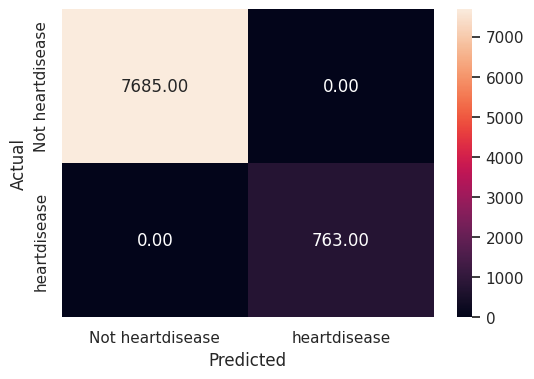

Test Result:
Accuracy Score: 90.78%
_______________________________________________
F1 Score: 0.12
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.914697     0.437372  0.907818      0.676035      0.871558
recall         0.991086     0.069745  0.907818      0.530415      0.907818
f1-score       0.951361     0.120305  0.907818      0.535833      0.876253
support    30738.000000  3054.000000  0.907818  33792.000000  33792.000000
_______________________________________________


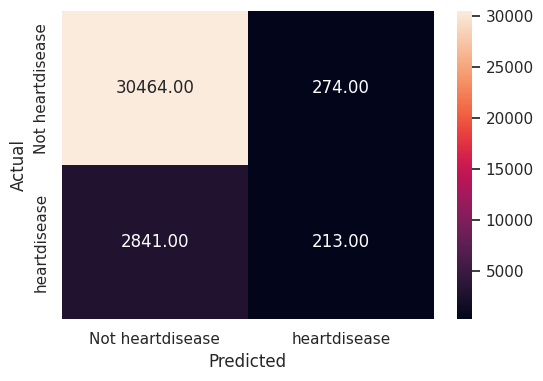

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
evaluation(rfc, X_train, y_train, X_test, y_test, False)

The Random Forest Classifier model yields a recall score of 1.0 on training data and 0.06 on test data, which is not ideal.




In [ ]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

Support Vector Machine

Train Result:
Accuracy Score: 94.93%
_______________________________________________
F1 Score: 0.61
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.947687    0.988338  0.949337     0.968012      0.951358
recall        0.999480    0.444299  0.949337     0.721889      0.949337
f1-score      0.972894    0.613020  0.949337     0.792957      0.940391
support    7685.000000  763.000000  0.949337  8448.000000   8448.000000
_______________________________________________


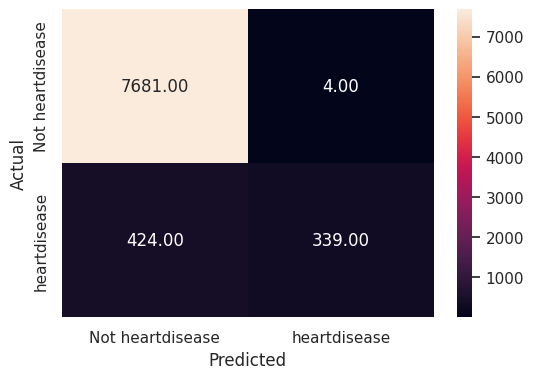

Test Result:
Accuracy Score: 90.83%
_______________________________________________
F1 Score: 0.04
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.910891     0.358491  0.908292      0.634691      0.860967
recall         0.996682     0.018664  0.908292      0.507673      0.908292
f1-score       0.951857     0.035481  0.908292      0.493669      0.869038
support    30738.000000  3054.000000  0.908292  33792.000000  33792.000000
_______________________________________________


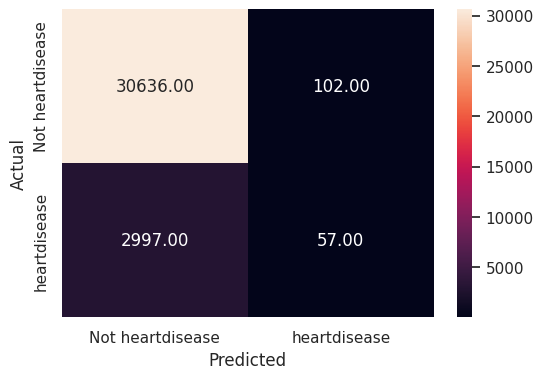

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)

evaluation(svm, X_train, y_train, X_test, y_test, True)
evaluation(svm, X_train, y_train, X_test, y_test, False)

The support vector machine model yields a recall score of 0.4 on training data and 0.01 on test data, which is not ideal.

In [ ]:
train_score_svm = round(accuracy_score(y_train, svm.predict(X_train)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm.predict(X_test)) * 100, 2)

Summary of Evaluation model

In [ ]:
models = {
           'Train Accuracy': [train_score_lr, train_score_rfc, train_score_knn, train_score_svm],
          'Test Accuracy' : [test_score_lr, test_score_rfc, test_score_knn, test_score_svm]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Random Forest Classifier', 'K-Nearest Neighbor', 'Support Vector Machine'])

In [ ]:
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,90.99,91.10
Random Forest Classifier,100.00,90.78
K-Nearest Neighbor,92.20,90.07
Support Vector Machine,94.93,90.83


from matplotlib import pyplot as plt
_df_0['Train Accuracy'].plot(kind='hist', bins=20, title='Train Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Train Accuracy', y='Test Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Train Accuracy'].plot(kind='line', figsize=(8, 4), title='Train Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

Logistic Regression:
This model performs well and has almost identical train and test accuracy, indicating it is not overfitting or underfitting the data.



Random Forest Classifier:
The model achieves perfect accuracy on the training data, but the test accuracy is slightly lower. This suggests overfitting: the model memorizes the training data but generalizes less effectively to new data.


K-Nearest Neighbor (KNN):
This model shows a slight drop in accuracy from training to testing, which is normal. The relatively low test accuracy compared to other models may indicate that KNN is not capturing complex patterns in the data effectively.


Support Vector Machine (SVM):
This model has a reasonable balance between train and test accuracy. The gap suggests the model generalizes well without overfitting.

Key Observations:
Logistic Regression has the best test accuracy, indicating it generalizes well to unseen data.

Random Forest Classifier shows signs of overfitting, as evidenced by the perfect training accuracy but lower test accuracy.

KNN and SVM exhibit acceptable generalization but do not outperform Logistic Regression.


Recommendations:
Consider Logistic Regression as the primary model if simplicity and generalization are prioritized.
Random Forest might require regularization or parameter tuning to reduce overfitting.